# 課題

(1)演習1の内容・結果・考察をまとめよ.

(2)演習2の内容・結果・考察をまとめよ.

### 演習1
極の値の違いによるインパルス応答の違いを調べるために，以下のそれぞれの組み合わせについて，インパルス応答を重ねてプロットせよ．極が実数の場合はゲインは1とする（一次システムの形）．

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import *
t = np.linspace(0, 2, 1000)
z = []

(a).実部だけ違う場合：$p=0\pm j20, -1\pm j20, -2\pm j20, -3\pm j20$

In [2]:
p1 = [[20j, -20j], [-1 + 20j, -1 - 20j], [-2 + 20j, -2 - 20j], [-3 + 20j, -3 - 20j]]
k1 = 20

n1_0, d1_0 = zpk2tf(z, p1[0], k1)
n1_1, d1_1 = zpk2tf(z, p1[1], k1)
n1_2, d1_2 = zpk2tf(z, p1[2], k1)
n1_3, d1_3 = zpk2tf(z, p1[3], k1)

G1_0 = tf(n1_0, d1_0)
G1_1 = tf(n1_1, d1_1)
G1_2 = tf(n1_2, d1_2)
G1_3 = tf(n1_3, d1_3)

y1_0, t = impulse(G1_0, t)
y1_1, t = impulse(G1_1, t)
y1_2, t = impulse(G1_2, t)
y1_3, t = impulse(G1_3, t)

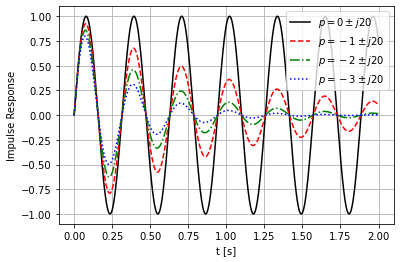

In [3]:
plt.plot(t, y1_0, label="$p=0\pm j20$", color="black")
plt.plot(t, y1_1, linestyle="--", label="$p=-1\pm j20$", color="red")
plt.plot(t, y1_2, linestyle="-.", label="$p=-2\pm j20$", color="green")
plt.plot(t, y1_3, linestyle=":", label="$p=-3\pm j20$", color="blue")
plt.xlabel("t [s]")
plt.ylabel("Impulse Response")
plt.legend()
plt.grid()
plt.show()

(b).虚部だけ違う場合：$p=-1, -1\pm j10, -1\pm j20, -1\pm j30$

In [4]:
p2 = [[-1], [-1 + 10j, -1 - 10j], [-1 + 20j, -1 - 20j], [-1 + 30j, -1 - 30j]]
k2 = [1, 10, 20, 30]

n2_0, d2_0 = zpk2tf(z, p2[0], k2[0])
n2_1, d2_1 = zpk2tf(z, p2[1], k2[1])
n2_2, d2_2 = zpk2tf(z, p2[2], k2[2])
n2_3, d2_3 = zpk2tf(z, p2[3], k2[3])

G2_0 = tf(n2_0, d2_0)
G2_1 = tf(n2_1, d2_1)
G2_2 = tf(n2_2, d2_2)
G2_3 = tf(n2_3, d2_3)

y2_0, t = impulse(G2_0, t)
y2_1, t = impulse(G2_1, t)
y2_2, t = impulse(G2_2, t)
y2_3, t = impulse(G2_3, t)

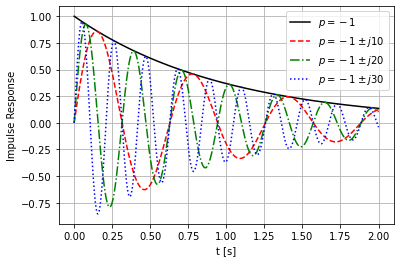

In [5]:
plt.plot(t, y2_0, label="$p=-1$", color="black")
plt.plot(t, y2_1, linestyle="--", label="$p=-1\pm j10$", color="red")
plt.plot(t, y2_2, linestyle="-.", label="$p=-1\pm j20$", color="green")
plt.plot(t, y2_3, linestyle=":", label="$p=-1\pm j30$", color="blue")
plt.xlabel("t [s]")
plt.ylabel("Impulse Response")
plt.legend()
plt.grid()
plt.show()

(c).実部と虚部が比例：$p=-1\pm j10, -2\pm j20, -3\pm j30$

In [6]:
p3 = [[-1 + 10j, -1 - 10j], [-2 + 20j, -2 - 20j], [-3 + 30j, -3 - 30j]]
k3 = [10, 20, 30]

n3_0, d3_0 = zpk2tf(z, p3[0], k3[0])
n3_1, d3_1 = zpk2tf(z, p3[1], k3[1])
n3_2, d3_2 = zpk2tf(z, p3[2], k3[2])

G3_0 = tf(n3_0, d3_0)
G3_1 = tf(n3_1, d3_1)
G3_2 = tf(n3_2, d3_2)

y3_0, t = impulse(G3_0, t)
y3_1, t = impulse(G3_1, t)
y3_2, t = impulse(G3_2, t)

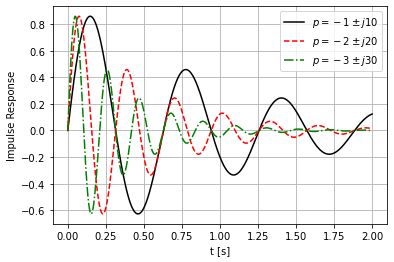

In [7]:
plt.plot(t, y3_0, label="$p=-1\pm j10$", color="black")
plt.plot(t, y3_1, linestyle="--", label="$p=-2\pm j20$", color="red")
plt.plot(t, y3_2, linestyle="-.", label="$p=-3\pm j30$", color="green")
plt.xlabel("t [s]")
plt.ylabel("Impulse Response")
plt.legend()
plt.grid()
plt.show()

### 考察

(a)より，極の実部の絶対値が大きいほど収束が早くなっていることがわかる．

(b)より，極の虚部の絶対値が大きいほど振動性が高くなる事がわかる．

(c)では，振動の周期は異なるが，波の大きさは等しい．よって，極の実部と虚部の両方の値がオーバーシュートの量に関係することがわかる．

### 演習2
Python-controlを使い，一巡伝達関数が2次システム
\begin{eqnarray}
L(s) = \frac{\omega_n^2}{s^2+2\zeta \omega_n s+\omega_n^2} \nonumber
\end{eqnarray}
において，これらの値が変化すると過渡応答がどのように変化するか調べてみる．実行例を参考に，以下のそれぞれの組み合わせについて，ステップ応答を重ねてプロットせよ．

(a)$\omega_g$が異なる場合：$(\zeta, \omega_n) = (0.3, 1), (0.3, 3), (0.3, 5)$

In [8]:
zeta1 = 0.3
wn1 = [1, 3, 5]

n1 = [[wn1[0]**2], [wn1[1]**2], [wn1[2]**2]]
d1 = [[1, 2*zeta1*wn1[0], wn1[0]**2],[1, 2*zeta1*wn1[1], wn1[1]**2],[1, 2*zeta1*wn1[2], wn1[2]**2]]

L1_0 = tf(n1[0], d1[0])
L1_1 = tf(n1[1], d1[1])
L1_2 = tf(n1[2], d1[2])

GM1_0, PM1_0, wp1_0, wg1_0 = margin(L1_0)
GM1_1, PM1_1, wp1_1, wg1_1 = margin(L1_1)
GM1_2, PM1_2, wp1_2, wg1_2 = margin(L1_2)

G1_0 = feedback(L1_0, 1)
G1_1 = feedback(L1_1, 1)
G1_2 = feedback(L1_2, 1)

t = np.linspace(0, 10, 1000)

y1_0, t = step(G1_0, t)
y1_1, t = step(G1_1, t)
y1_2, t = step(G1_2, t)

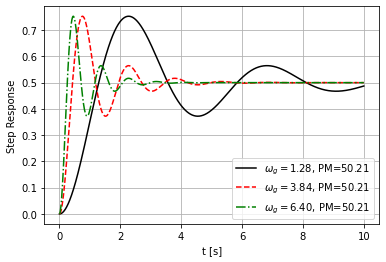

In [9]:
plt.plot(t, y1_0, label="$\omega_g=1.28$, PM=50.21", color="black")
plt.plot(t, y1_1, label="$\omega_g=3.84$, PM=50.21", linestyle="--", color="red")
plt.plot(t, y1_2, label="$\omega_g=6.40$, PM=50.21", linestyle="-.", color="green")
plt.xlabel("t [s]")
plt.ylabel("Step Response")
plt.legend()
plt.grid()
plt.show()

(b)PMが異なる場合：$(\zeta, \omega_n) = (0.2, 2.21), (0.3, 2.34), (0.4, 2.57)$

In [10]:
zeta2 = [0.2, 0.3, 0.4]
wn2 = [2.21, 2.34, 2.57]

n2 = [[wn2[0]**2], [wn2[1]**2], [wn2[2]**2]]
d2= [[1, 2*zeta2[0]*wn2[0], wn2[0]**2],[1, 2*zeta2[1]*wn2[1], wn2[1]**2],[1, 2*zeta2[2]*wn2[2], wn2[2]**2]]

L2_0 = tf(n2[0], d2[0])
L2_1 = tf(n2[1], d2[1])
L2_2 = tf(n2[2], d2[2])

GM2_0, PM2_0, wp2_0, wg2_0 = margin(L2_0)
GM2_1, PM2_1, wp2_1, wg2_1 = margin(L2_1)
GM2_2, PM2_2, wp2_2, wg2_2 = margin(L2_2)

G2_0 = feedback(L2_0, 1)
G2_1 = feedback(L2_1, 1)
G2_2 = feedback(L2_2, 1)

t = np.linspace(0, 10, 1000)

y2_0, t = step(G2_0, t)
y2_1, t = step(G2_1, t)
y2_2, t = step(G2_2, t)

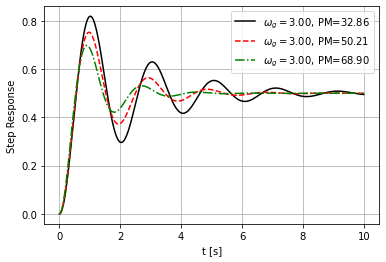

In [11]:
plt.plot(t, y2_0, label="$\omega_g=3.00$, PM=32.86", color="black")
plt.plot(t, y2_1, label="$\omega_g=3.00$, PM=50.21", linestyle="--", color="red")
plt.plot(t, y2_2, label="$\omega_g=3.00$, PM=68.90", linestyle="-.", color="green")
plt.xlabel("t [s]")
plt.ylabel("Step Response")
plt.legend()
plt.grid()
plt.show()

### 考察

(a)の結果から，ゲイン交差周波数$\omega_g$が大きいほど，立上がりが速いことがわかる．

(b)の結果から，位相余裕PMが大きいほどオーバーシュートが小さく，収束が早いことがわかる。